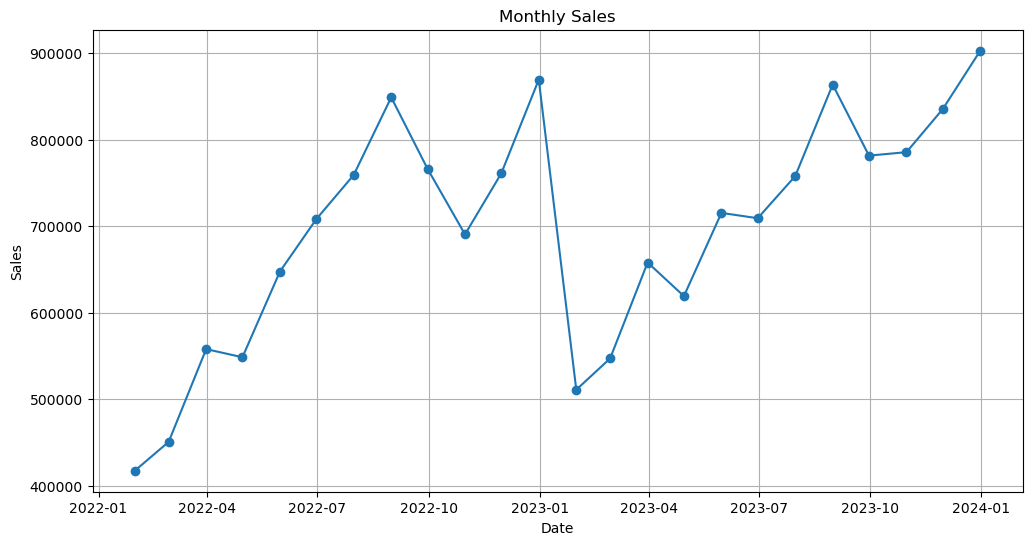

In [1]:
import pandas as pd

# Load data
data = pd.read_excel('data_ML.xlsx')

# Convert Order_date to datetime
data['Order_date'] = pd.to_datetime(data['Order_date'])

# Aggregate sales by month
monthly_sales = data.resample('M', on='Order_date')['Sales'].sum().reset_index()

import matplotlib.pyplot as plt

# Plot the monthly sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Order_date'], monthly_sales['Sales'], marker='o')
plt.title('Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


# Prophet Model

14:51:19 - cmdstanpy - INFO - Chain [1] start processing
14:52:09 - cmdstanpy - INFO - Chain [1] done processing


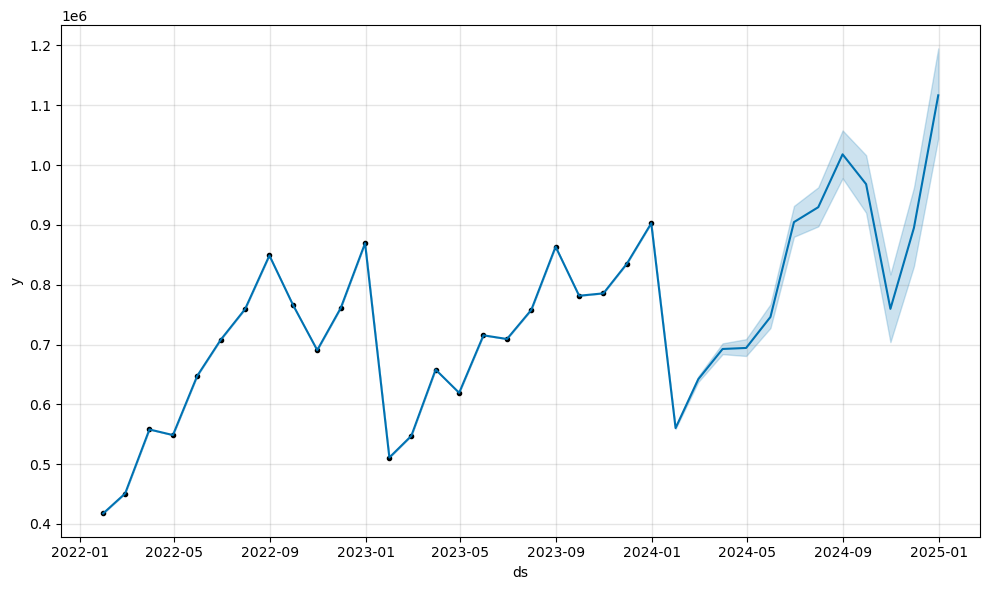

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Prepare data for Prophet
monthly_sales.columns = ['ds', 'y']

# Initialize and fit the model
model = Prophet(yearly_seasonality=True, daily_seasonality=False)
model.fit(monthly_sales)

# Create future dates for prediction (e.g., next 12 months)
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.show()


# Cross-Validation Prophet

In [5]:
from prophet.diagnostics import cross_validation, performance_metrics

# Perform cross-validation with adjusted parameters
df_cv = cross_validation(model, initial='180 days', period='90 days', horizon='180 days')

# Calculate performance metrics
df_p = performance_metrics(df_cv)
print(df_p.head())


Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/4 [00:00<?, ?it/s]

14:52:09 - cmdstanpy - INFO - Chain [1] start processing
14:52:11 - cmdstanpy - INFO - Chain [1] done processing
14:52:11 - cmdstanpy - INFO - Chain [1] start processing
14:52:24 - cmdstanpy - INFO - Chain [1] done processing
14:52:24 - cmdstanpy - INFO - Chain [1] start processing
14:52:38 - cmdstanpy - INFO - Chain [1] done processing
14:52:38 - cmdstanpy - INFO - Chain [1] start processing
14:52:39 - cmdstanpy - INFO - Chain [1] done processing


  horizon           mse          rmse           mae      mape     mdape  \
0 25 days  6.396366e+13  7.997728e+06  5.713428e+06  8.283303  8.283303   
1 26 days  3.499495e+11  5.915653e+05  4.726739e+05  0.904892  0.904892   
2 27 days  3.569529e+11  5.974554e+05  4.973894e+05  0.920227  0.920227   
3 54 days  2.416284e+13  4.915571e+06  3.736967e+06  5.049892  5.049892   
4 56 days  1.208495e+13  3.476341e+06  1.910493e+06  2.583670  0.555356   

      smape  coverage  
0  1.104296       0.0  
1  0.551946       0.0  
2  0.546572       0.0  
3  1.331833       0.0  
4  0.721383       0.0  


In [6]:
#The metrics vary significantly across different horizons, indicating variability in forecast accuracy over different time periods.
#Coverage is 0.0, suggesting that the model's uncertainty intervals are not capturing the true values, which is a concern.

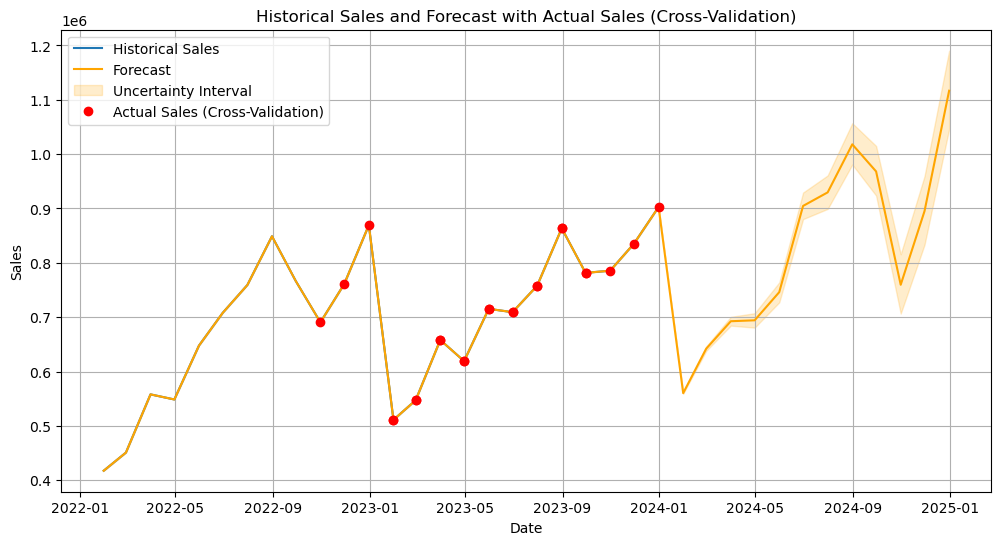

In [7]:

# Create a future dataframe for the forecast
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Plot the historical data, the forecast, and the actual values from the cross-validation
plt.figure(figsize=(12, 6))

# Plot historical data
plt.plot(monthly_sales['ds'], monthly_sales['y'], label='Historical Sales')

# Plot forecasted data
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='orange')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.2, label='Uncertainty Interval')

# Plot the actual values from cross-validation
plt.plot(df_cv['ds'], df_cv['y'], 'ro', label='Actual Sales (Cross-Validation)')

# Add titles and labels
plt.title('Historical Sales and Forecast with Actual Sales (Cross-Validation)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


14:52:39 - cmdstanpy - INFO - Chain [1] start processing
14:53:43 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/4 [00:00<?, ?it/s]

14:53:44 - cmdstanpy - INFO - Chain [1] start processing
14:53:45 - cmdstanpy - INFO - Chain [1] done processing
14:53:45 - cmdstanpy - INFO - Chain [1] start processing
14:54:24 - cmdstanpy - INFO - Chain [1] done processing
14:54:24 - cmdstanpy - INFO - Chain [1] start processing
14:54:28 - cmdstanpy - INFO - Chain [1] done processing
14:54:28 - cmdstanpy - INFO - Chain [1] start processing
14:54:29 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\gabb_\AppData\Local\Temp\ipykernel_17820\419394185.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(forecast['ds'], forecast['yhat'], 'r-', label='Forecast', color='red')


  horizon           mse          rmse           mae       mape      mdape  \
0 25 days  5.244922e+13  7.242183e+06  7.126992e+06  11.022439  11.022439   
1 26 days  9.952195e+13  9.976069e+06  9.869284e+06  17.873505  17.873505   
2 27 days  1.133775e+14  1.064789e+07  1.062484e+07  17.627712  17.627712   
3 54 days  5.508646e+13  7.422025e+06  6.135736e+06  10.709242  10.709242   
4 56 days  4.152555e+13  6.444032e+06  5.711948e+06   9.050671  13.117764   

      smape  coverage  
0  1.808749       0.0  
1  2.000000       0.0  
2  2.000000       0.0  
3  1.562847       0.0  
4  1.781423       0.0  


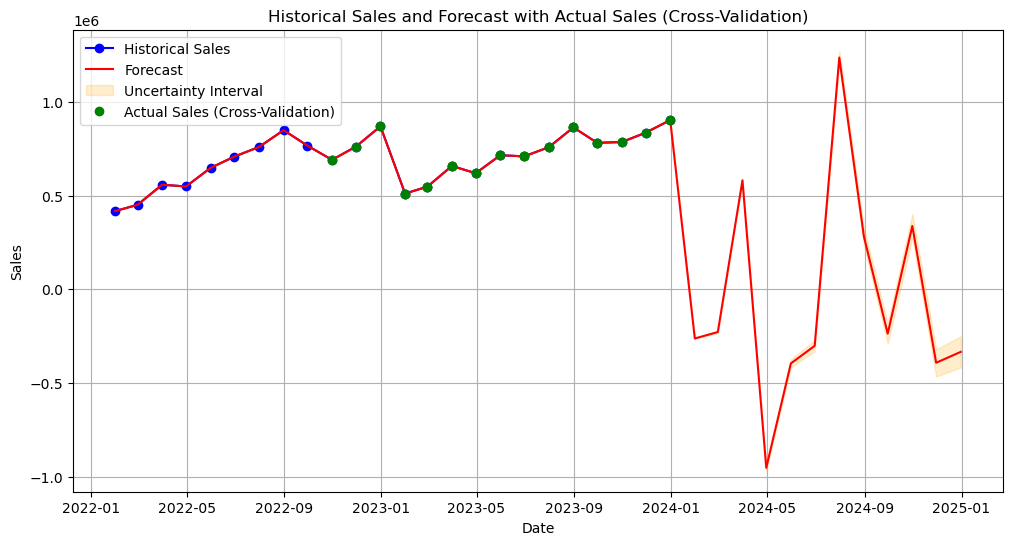

In [8]:

# Initialize and fit the model with additional parameters
model = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
# If holidays are important, you can add holidays specific to your country
# model.add_country_holidays(country_name='US')

# Fit the model
model.fit(monthly_sales)

# Perform cross-validation with adjusted parameters
df_cv = cross_validation(model, initial='180 days', period='90 days', horizon='180 days')

# Calculate performance metrics
df_p = performance_metrics(df_cv)
print(df_p.head())

# Create a future dataframe for the forecast
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Plot the historical data, the forecast, and the actual values from the cross-validation
plt.figure(figsize=(12, 6))

# Plot historical data in blue
plt.plot(monthly_sales['ds'], monthly_sales['y'], 'bo-', label='Historical Sales')

# Plot forecasted data in red
plt.plot(forecast['ds'], forecast['yhat'], 'r-', label='Forecast', color='red')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.2, label='Uncertainty Interval')

# Plot the actual values from cross-validation in green
plt.plot(df_cv['ds'], df_cv['y'], 'go', label='Actual Sales (Cross-Validation)')

# Add titles and labels
plt.title('Historical Sales and Forecast with Actual Sales (Cross-Validation)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


# Hypertuning

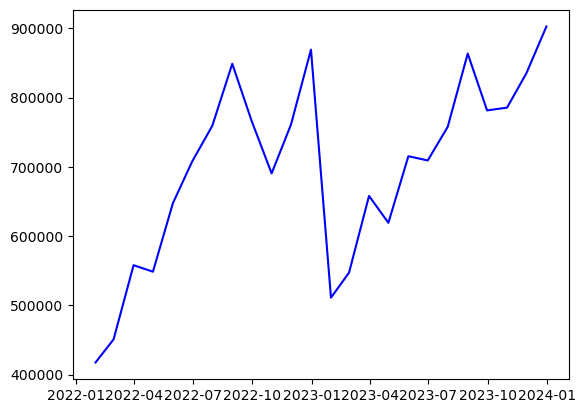

In [9]:
# Plot historical data in blue
plt.plot(monthly_sales['ds'], monthly_sales['y'], 'b-', label='Historical Sales')

14:54:30 - cmdstanpy - INFO - Chain [1] start processing
14:55:10 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/5 [00:00<?, ?it/s]

14:55:11 - cmdstanpy - INFO - Chain [1] start processing
14:55:12 - cmdstanpy - INFO - Chain [1] done processing
14:55:12 - cmdstanpy - INFO - Chain [1] start processing
14:55:12 - cmdstanpy - INFO - Chain [1] done processing
14:55:13 - cmdstanpy - INFO - Chain [1] start processing
14:55:49 - cmdstanpy - INFO - Chain [1] done processing
14:55:49 - cmdstanpy - INFO - Chain [1] start processing
14:55:50 - cmdstanpy - INFO - Chain [1] done processing
14:55:50 - cmdstanpy - INFO - Chain [1] start processing
14:56:14 - cmdstanpy - INFO - Chain [1] done processing


Performance Metrics Head:
   horizon           mse          rmse           mae      mape     mdape  \
0 25 days  4.670799e+13  6.834324e+06  5.664313e+06  7.956717  8.486320   
1 26 days  3.855490e+13  6.209259e+06  4.893185e+06  7.821511  8.080701   
2 27 days  5.836375e+12  2.415859e+06  1.660100e+06  3.130706  1.033887   
3 53 days  1.500985e+13  3.874254e+06  3.208337e+06  4.861293  6.225646   
4 54 days  1.045858e+13  3.233972e+06  2.635534e+06  3.436463  2.273982   

      smape  coverage  
0  1.918450       0.0  
1  1.918450       0.0  
2  1.414571       0.0  
3  1.252476       0.0  
4  1.487927       0.0  


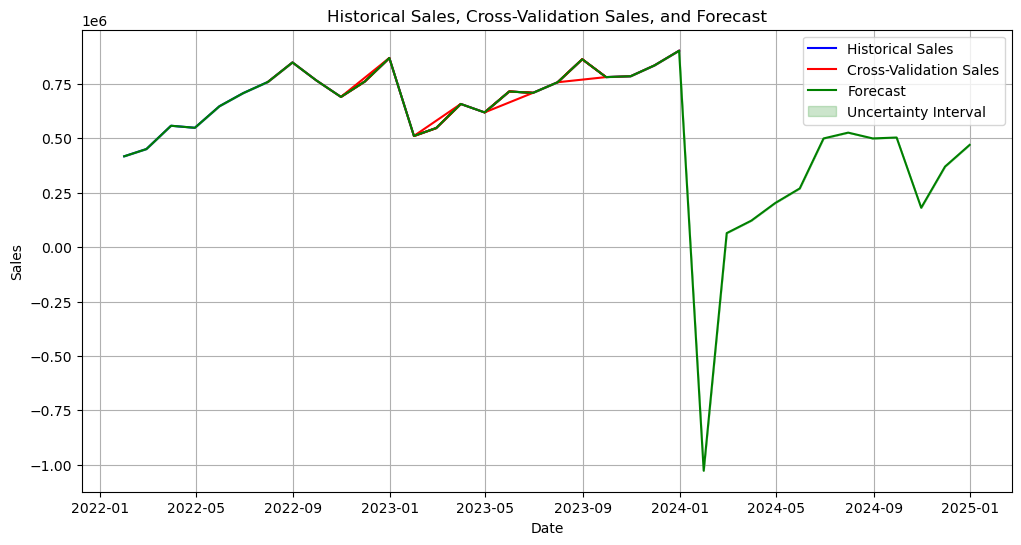

In [10]:
# Initialize the model with yearly seasonality
model = Prophet(yearly_seasonality=True, weekly_seasonality=False)
# Add custom monthly seasonality
model.add_seasonality(name='monthly', period=30.5, fourier_order=12)

# Fit the model
model.fit(monthly_sales)

# Perform cross-validation with adjusted parameters
df_cv = cross_validation(model, initial='90 days', period='90 days', horizon='180 days')

# Calculate performance metrics
df_p = performance_metrics(df_cv)
print("Performance Metrics Head:\n", df_p.head())

# Create a future dataframe for the forecast
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Plot the historical data, cross-validation data, and forecasted data
plt.figure(figsize=(12, 6))

# Plot historical data in blue (Real Sales Line)
plt.plot(monthly_sales['ds'], monthly_sales['y'], 'b-', label='Historical Sales')

# Ensure the cross-validation data is plotted within the same date range
df_cv = df_cv[df_cv['ds'] >= monthly_sales['ds'].min()]
plt.plot(df_cv['ds'], df_cv['y'], 'r-', label='Cross-Validation Sales')

# Plot forecasted data in green
plt.plot(forecast['ds'], forecast['yhat'], 'g-', label='Forecast')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='green', alpha=0.2, label='Uncertainty Interval')

# Add titles and labels
plt.title('Historical Sales, Cross-Validation Sales, and Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


# Scaling

14:56:15 - cmdstanpy - INFO - Chain [1] start processing
14:56:57 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/5 [00:00<?, ?it/s]

14:56:58 - cmdstanpy - INFO - Chain [1] start processing
14:56:58 - cmdstanpy - INFO - Chain [1] done processing
14:56:58 - cmdstanpy - INFO - Chain [1] start processing
14:56:58 - cmdstanpy - INFO - Chain [1] done processing
14:56:58 - cmdstanpy - INFO - Chain [1] start processing
14:57:21 - cmdstanpy - INFO - Chain [1] done processing
14:57:22 - cmdstanpy - INFO - Chain [1] start processing
14:57:33 - cmdstanpy - INFO - Chain [1] done processing
14:57:34 - cmdstanpy - INFO - Chain [1] start processing
14:57:37 - cmdstanpy - INFO - Chain [1] done processing


Performance Metrics Head:
   horizon        mse      rmse       mae       mape      mdape     smape  \
0 25 days  62.824726  7.926205  6.460461  10.449887  12.425252  1.372991   
1 26 days  41.667007  6.454999  4.750032  12.564533  18.769192  1.308793   
2 27 days   4.393832  2.096147  1.317989   6.432634   0.402214  0.753749   
3 53 days   5.682038  2.383703  1.955983   7.127832   2.212089  1.064210   
4 54 days  12.458364  3.529641  3.261922   6.512049   7.234322  1.573164   

   coverage  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  


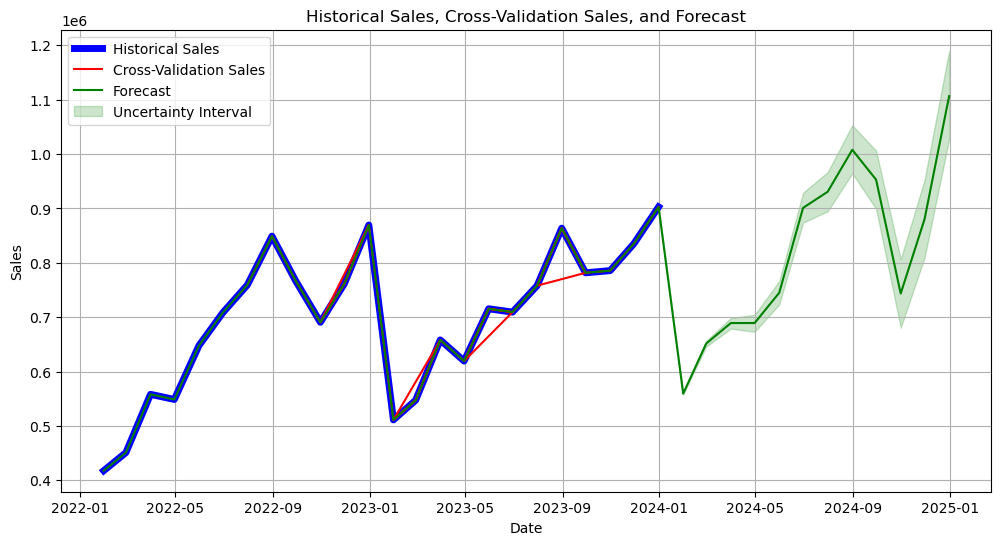

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Scaling the data
scaler = MinMaxScaler()
monthly_sales['y'] = scaler.fit_transform(monthly_sales[['y']])

# Initialize and fit the model
model = Prophet(yearly_seasonality=True, daily_seasonality=False)
model.fit(monthly_sales)

# Perform cross-validation with adjusted parameters
df_cv = cross_validation(model, initial='90 days', period='90 days', horizon='180 days')

# Calculate performance metrics
df_p = performance_metrics(df_cv)
print("Performance Metrics Head:\n", df_p.head())

# Create a future dataframe for the forecast
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Inverse transform the forecasted values
forecast['yhat'] = scaler.inverse_transform(forecast[['yhat']])
forecast['yhat_lower'] = scaler.inverse_transform(forecast[['yhat_lower']])
forecast['yhat_upper'] = scaler.inverse_transform(forecast[['yhat_upper']])

# Inverse transform the cross-validation actual values
df_cv['y'] = scaler.inverse_transform(df_cv[['y']])

# Plot the historical data, cross-validation data, and forecasted data
plt.figure(figsize=(12, 6))

# Plot historical data in blue (Real Sales Line)
plt.plot(monthly_sales['ds'], scaler.inverse_transform(monthly_sales[['y']]), 'b-', label='Historical Sales', linewidth= 5)

# Plot the actual values from cross-validation in red
plt.plot(df_cv['ds'], df_cv['y'], 'r-', label='Cross-Validation Sales')

# Plot forecasted data in green
plt.plot(forecast['ds'], forecast['yhat'], 'g-', label='Forecast')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='green', alpha=0.2, label='Uncertainty Interval')

# Add titles and labels
plt.title('Historical Sales, Cross-Validation Sales, and Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


14:57:38 - cmdstanpy - INFO - Chain [1] start processing
14:58:54 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/5 [00:00<?, ?it/s]

14:58:54 - cmdstanpy - INFO - Chain [1] start processing
14:59:34 - cmdstanpy - INFO - Chain [1] done processing
14:59:34 - cmdstanpy - INFO - Chain [1] start processing
14:59:52 - cmdstanpy - INFO - Chain [1] done processing
14:59:52 - cmdstanpy - INFO - Chain [1] start processing
15:00:33 - cmdstanpy - INFO - Chain [1] done processing
15:00:33 - cmdstanpy - INFO - Chain [1] start processing
15:00:58 - cmdstanpy - INFO - Chain [1] done processing
15:00:58 - cmdstanpy - INFO - Chain [1] start processing
15:01:23 - cmdstanpy - INFO - Chain [1] done processing


Performance Metrics Head:
   horizon        mse      rmse       mae      mape      mdape     smape  \
0 25 days  15.407009  3.925176  2.412723  4.341957   0.789688  1.154098   
1 26 days  17.470019  4.179715  3.202855  8.590500  12.065382  1.678924   
2 27 days   2.166448  1.471886  1.084213  4.774813   0.789688  1.169692   
3 53 days  19.014345  4.360544  3.347116  7.180094   8.005531  1.401381   
4 54 days  23.899463  4.888708  4.534837  8.269596   8.005531  2.000000   

   coverage  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  


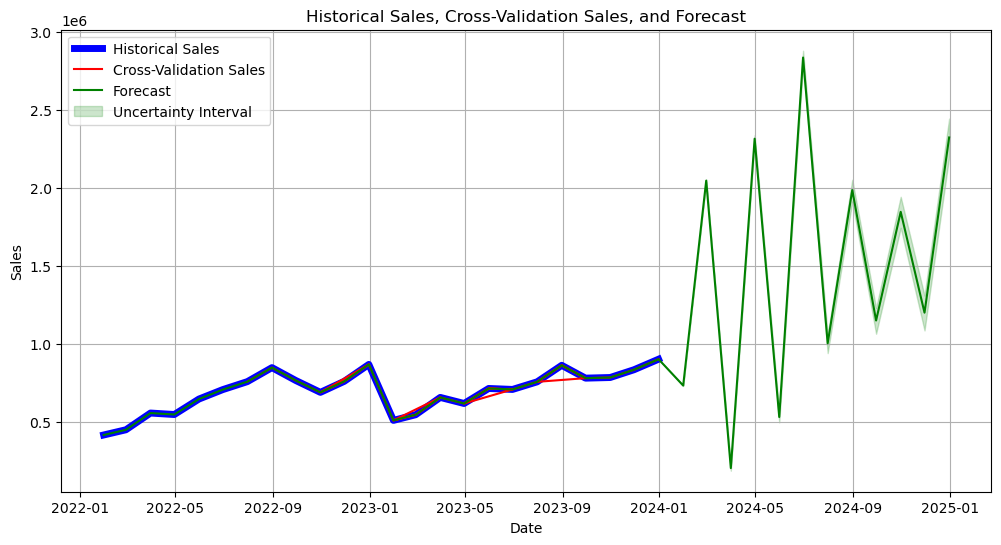

In [12]:
# Initialize the model with additional parameters for tuning
model = Prophet(yearly_seasonality=True, weekly_seasonality=False, changepoint_prior_scale=0.5, seasonality_prior_scale=10.0, interval_width=0.95)
model.add_seasonality(name='monthly', period=30.5, fourier_order=12)

# Fit the model
model.fit(monthly_sales)

# Perform cross-validation with adjusted parameters
df_cv = cross_validation(model, initial='90 days', period='90 days', horizon='180 days')

# Calculate performance metrics
df_p = performance_metrics(df_cv)
print("Performance Metrics Head:\n", df_p.head())

# Create a future dataframe for the forecast
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Inverse transform the forecasted values
forecast['yhat'] = scaler.inverse_transform(forecast[['yhat']])
forecast['yhat_lower'] = scaler.inverse_transform(forecast[['yhat_lower']])
forecast['yhat_upper'] = scaler.inverse_transform(forecast[['yhat_upper']])

# Inverse transform the cross-validation actual values
df_cv['y'] = scaler.inverse_transform(df_cv[['y']])

# Plot the historical data, cross-validation data, and forecasted data
plt.figure(figsize=(12, 6))

# Plot historical data in blue (Real Sales Line)
plt.plot(monthly_sales['ds'], scaler.inverse_transform(monthly_sales[['y']]), 'b-', label='Historical Sales', linewidth=5)

# Plot the actual values from cross-validation in red
plt.plot(df_cv['ds'], df_cv['y'], 'r-', label='Cross-Validation Sales')

# Plot forecasted data in green
plt.plot(forecast['ds'], forecast['yhat'], 'g-', label='Forecast')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='green', alpha=0.2, label='Uncertainty Interval')

# Add titles and labels
plt.title('Historical Sales, Cross-Validation Sales, and Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


15:01:24 - cmdstanpy - INFO - Chain [1] start processing
15:02:13 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/5 [00:00<?, ?it/s]

15:02:13 - cmdstanpy - INFO - Chain [1] start processing
15:02:15 - cmdstanpy - INFO - Chain [1] done processing
15:02:15 - cmdstanpy - INFO - Chain [1] start processing
15:02:15 - cmdstanpy - INFO - Chain [1] done processing
15:02:16 - cmdstanpy - INFO - Chain [1] start processing
15:02:16 - cmdstanpy - INFO - Chain [1] done processing
15:02:17 - cmdstanpy - INFO - Chain [1] start processing
15:02:20 - cmdstanpy - INFO - Chain [1] done processing
15:02:20 - cmdstanpy - INFO - Chain [1] start processing
15:02:22 - cmdstanpy - INFO - Chain [1] done processing


Performance Metrics Head:
   horizon       mse      rmse       mae      mape     mdape     smape  \
0 25 days  0.007548  0.086881  0.071699  0.127475  0.067640  0.118378   
1 26 days  0.167846  0.409690  0.287520  1.306499  0.248957  0.523814   
2 27 days  0.182741  0.427482  0.325354  1.344035  0.361565  0.552084   
3 53 days  0.183084  0.427884  0.330290  1.337906  0.361565  0.546288   
4 54 days  1.817583  1.348178  1.106034  2.669084  2.605057  1.059243   

   coverage  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  


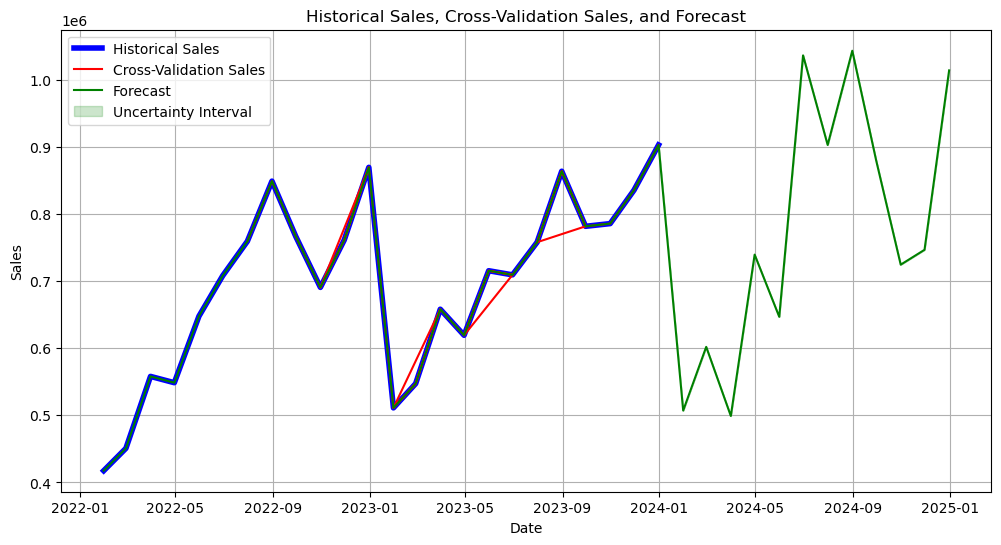

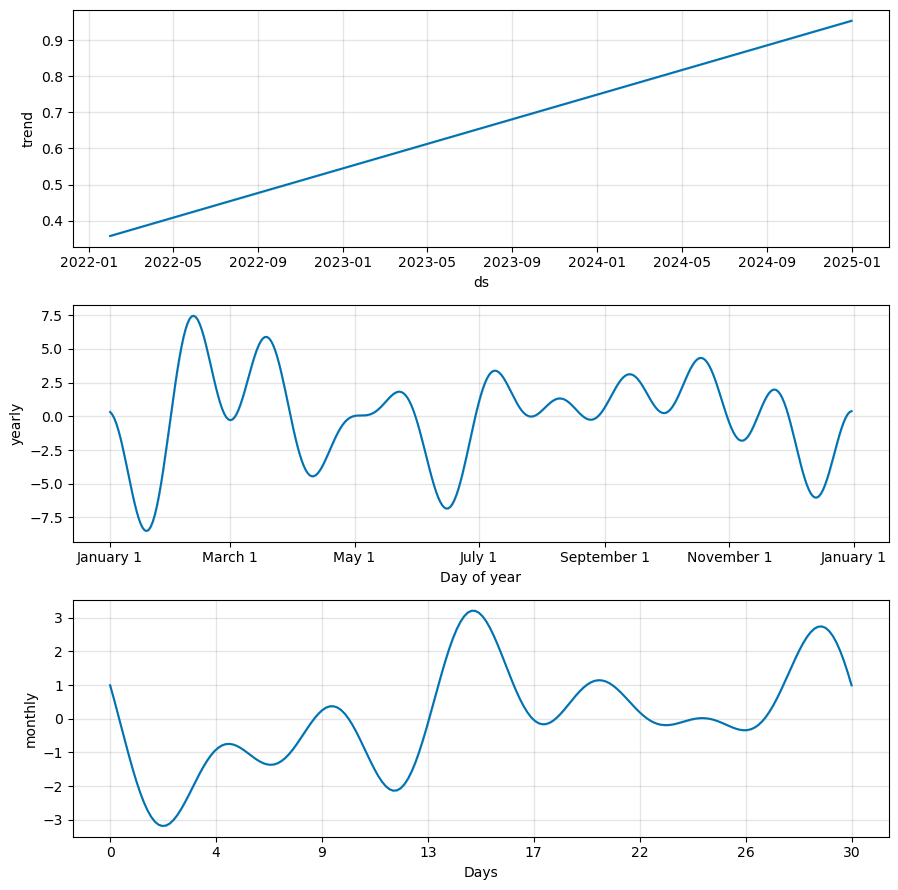

In [13]:
# Initialize the model with more conservative parameters
model = Prophet(yearly_seasonality=True, weekly_seasonality=False, changepoint_prior_scale=0.05, seasonality_prior_scale=1.0, interval_width=0.8)
model.add_seasonality(name='monthly', period=30.5, fourier_order=6)

# Fit the model
model.fit(monthly_sales)

# Perform cross-validation with adjusted parameters
df_cv = cross_validation(model, initial='90 days', period='90 days', horizon='180 days')

# Calculate performance metrics
df_p = performance_metrics(df_cv)
print("Performance Metrics Head:\n", df_p.head())

# Create a future dataframe for the forecast
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Inverse transform the forecasted values
forecast[['yhat', 'yhat_lower', 'yhat_upper']] = scaler.inverse_transform(forecast[['yhat', 'yhat_lower', 'yhat_upper']])

# Inverse transform the cross-validation actual values
df_cv['y'] = scaler.inverse_transform(df_cv[['y']])

# Plot the historical data, cross-validation data, and forecasted data
plt.figure(figsize=(12, 6))

# Plot historical data in blue (Real Sales Line)
plt.plot(monthly_sales['ds'], scaler.inverse_transform(monthly_sales[['y']]), 'b-', label='Historical Sales', linewidth=4)

# Plot the actual values from cross-validation in red
plt.plot(df_cv['ds'], df_cv['y'], 'r-', label='Cross-Validation Sales')

# Plot forecasted data in green
plt.plot(forecast['ds'], forecast['yhat'], 'g-', label='Forecast')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='green', alpha=0.2, label='Uncertainty Interval')

# Add titles and labels
plt.title('Historical Sales, Cross-Validation Sales, and Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Plot the seasonal components to understand model decomposition
model.plot_components(forecast)
plt.show()


15:02:23 - cmdstanpy - INFO - Chain [1] start processing
15:03:11 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/5 [00:00<?, ?it/s]

15:03:11 - cmdstanpy - INFO - Chain [1] start processing
15:03:13 - cmdstanpy - INFO - Chain [1] done processing
15:03:13 - cmdstanpy - INFO - Chain [1] start processing
15:03:13 - cmdstanpy - INFO - Chain [1] done processing
15:03:14 - cmdstanpy - INFO - Chain [1] start processing
15:03:14 - cmdstanpy - INFO - Chain [1] done processing
15:03:15 - cmdstanpy - INFO - Chain [1] start processing
15:03:18 - cmdstanpy - INFO - Chain [1] done processing
15:03:18 - cmdstanpy - INFO - Chain [1] start processing
15:03:20 - cmdstanpy - INFO - Chain [1] done processing


Performance Metrics Head:
   horizon       mse      rmse       mae      mape     mdape     smape  \
0 25 days  0.007548  0.086881  0.071699  0.127475  0.067640  0.118378   
1 26 days  0.167846  0.409690  0.287520  1.306499  0.248957  0.523814   
2 27 days  0.182741  0.427482  0.325354  1.344035  0.361565  0.552084   
3 53 days  0.183084  0.427884  0.330290  1.337906  0.361565  0.546288   
4 54 days  1.817583  1.348178  1.106034  2.669084  2.605057  1.059243   

   coverage  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  


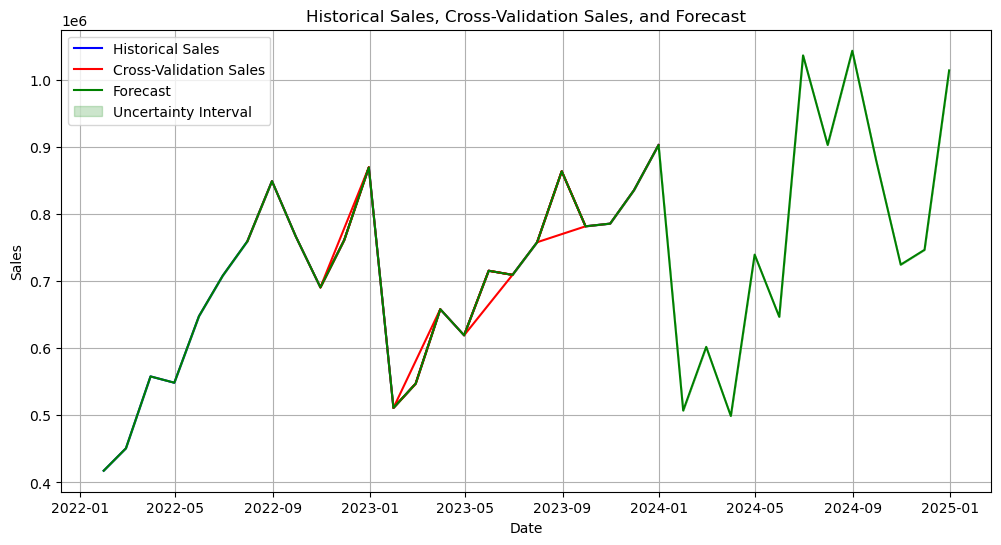

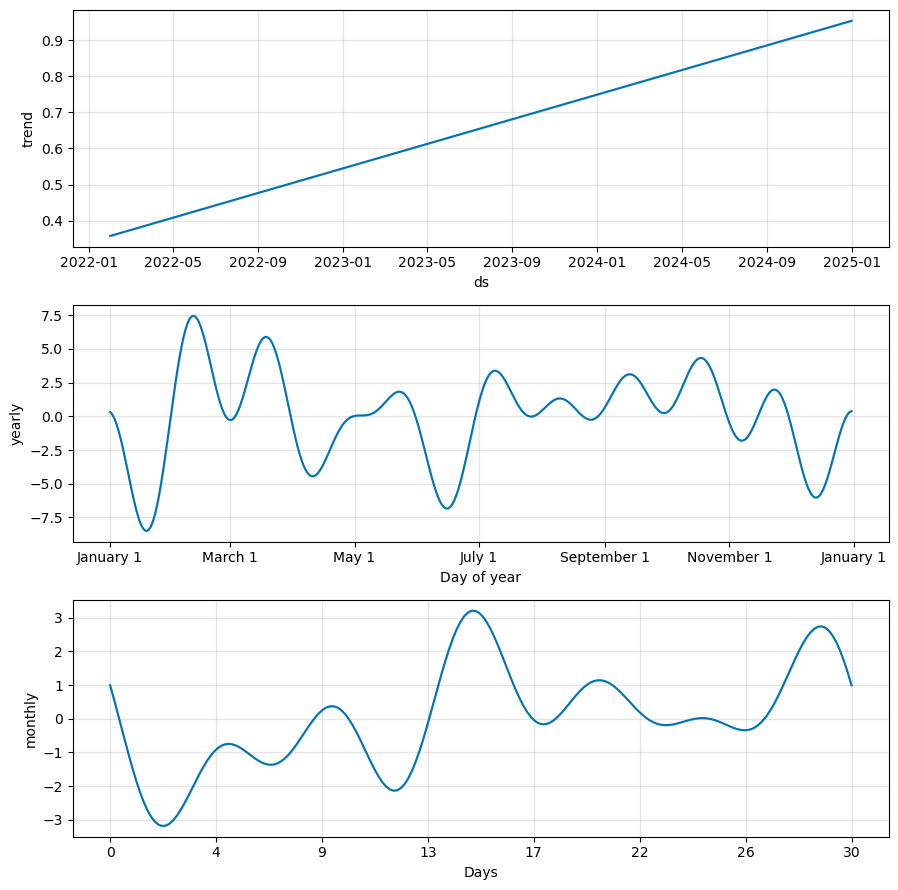

In [14]:

# Initialize the model with adjusted interval width
model = Prophet(yearly_seasonality=True, weekly_seasonality=False, changepoint_prior_scale=0.05, seasonality_prior_scale=1.0, interval_width=0.95)
model.add_seasonality(name='monthly', period=30.5, fourier_order=6)

# Fit the model
model.fit(monthly_sales)

# Perform cross-validation with adjusted parameters
df_cv = cross_validation(model, initial='90 days', period='90 days', horizon='180 days')

# Calculate performance metrics
df_p = performance_metrics(df_cv)
print("Performance Metrics Head:\n", df_p.head())

# Create a future dataframe for the forecast
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Inverse transform the forecasted values
forecast[['yhat', 'yhat_lower', 'yhat_upper']] = scaler.inverse_transform(forecast[['yhat', 'yhat_lower', 'yhat_upper']])

# Inverse transform the cross-validation actual values
df_cv['y'] = scaler.inverse_transform(df_cv[['y']])

# Plot the historical data, cross-validation data, and forecasted data
plt.figure(figsize=(12, 6))

# Plot historical data in blue (Real Sales Line)
plt.plot(monthly_sales['ds'], scaler.inverse_transform(monthly_sales[['y']]), 'b-', label='Historical Sales')

# Plot the actual values from cross-validation in red
plt.plot(df_cv['ds'], df_cv['y'], 'r-', label='Cross-Validation Sales')

# Plot forecasted data in green
plt.plot(forecast['ds'], forecast['yhat'], 'g-', label='Forecast')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='green', alpha=0.2, label='Uncertainty Interval')

# Add titles and labels
plt.title('Historical Sales, Cross-Validation Sales, and Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Plot the seasonal components to understand model decomposition
model.plot_components(forecast)
plt.show()


15:03:21 - cmdstanpy - INFO - Chain [1] start processing
15:04:10 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/5 [00:00<?, ?it/s]

15:04:10 - cmdstanpy - INFO - Chain [1] start processing
15:04:12 - cmdstanpy - INFO - Chain [1] done processing
15:04:12 - cmdstanpy - INFO - Chain [1] start processing
15:04:13 - cmdstanpy - INFO - Chain [1] done processing
15:04:13 - cmdstanpy - INFO - Chain [1] start processing
15:04:13 - cmdstanpy - INFO - Chain [1] done processing
15:04:14 - cmdstanpy - INFO - Chain [1] start processing
15:04:17 - cmdstanpy - INFO - Chain [1] done processing
15:04:17 - cmdstanpy - INFO - Chain [1] start processing
15:04:19 - cmdstanpy - INFO - Chain [1] done processing


Performance Metrics Head:
   horizon       mse      rmse       mae      mape     mdape     smape  \
0 25 days  0.007548  0.086881  0.071699  0.127475  0.067640  0.118378   
1 26 days  0.167846  0.409690  0.287520  1.306499  0.248957  0.523814   
2 27 days  0.182741  0.427482  0.325354  1.344035  0.361565  0.552084   
3 53 days  0.183084  0.427884  0.330290  1.337906  0.361565  0.546288   
4 54 days  1.817583  1.348178  1.106034  2.669084  2.605057  1.059243   

   coverage  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
Cross Validation Head with Prediction Intervals:
           ds      yhat  yhat_lower  yhat_upper         y     cutoff
0 2022-07-31  0.656620    0.656620    0.656620  0.704256 2022-07-09
1 2022-08-31  0.931182    0.931182    0.931182  0.889008 2022-07-09
2 2022-09-30  5.602162    5.602162    5.602162  0.719054 2022-07-09
3 2022-10-31  2.561993    2.561993    2.561993  0.562735 2022-07-09
4 2022-11-30  5.641881    5.641881    5.641881  0.707955 202

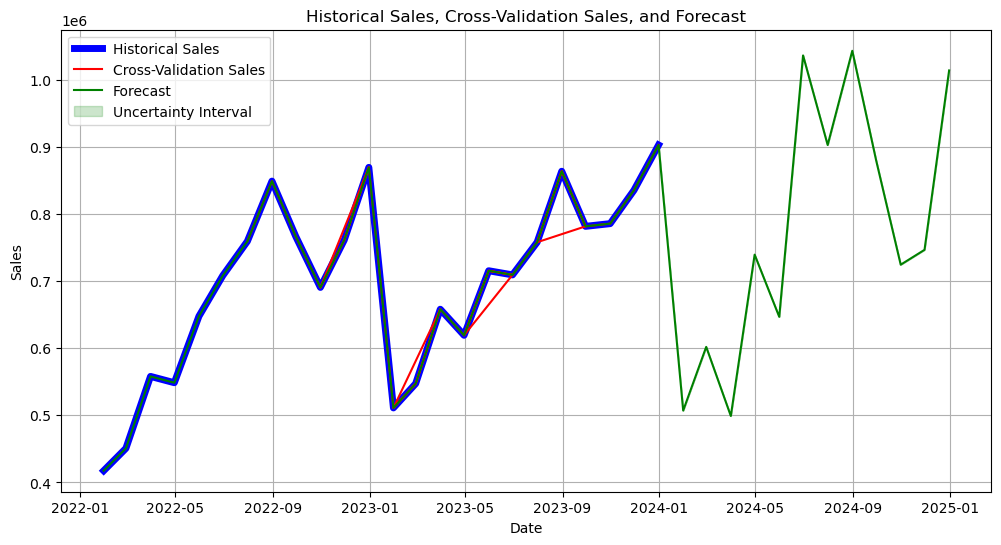

In [15]:
# Initialize the model with the maximum interval width
model = Prophet(yearly_seasonality=True, weekly_seasonality=False, changepoint_prior_scale=0.05, seasonality_prior_scale=1.0, interval_width=1.0)
model.add_seasonality(name='monthly', period=30.5, fourier_order=6)

# Fit the model
model.fit(monthly_sales)

# Perform cross-validation with adjusted parameters
df_cv = cross_validation(model, initial='90 days', period='90 days', horizon='180 days')

# Calculate performance metrics
df_p = performance_metrics(df_cv)
print("Performance Metrics Head:\n", df_p.head())

# Inspect some prediction intervals
print("Cross Validation Head with Prediction Intervals:\n", df_cv.head())

# Create a future dataframe for the forecast
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Inverse transform the forecasted values
forecast['yhat'] = scaler.inverse_transform(forecast[['yhat']])
forecast['yhat_lower'] = scaler.inverse_transform(forecast[['yhat_lower']])
forecast['yhat_upper'] = scaler.inverse_transform(forecast[['yhat_upper']])

# Inverse transform the cross-validation actual values
df_cv['y'] = scaler.inverse_transform(df_cv[['y']])

# Plot the historical data, cross-validation data, and forecasted data
plt.figure(figsize=(12, 6))

# Plot historical data in blue (Real Sales Line)
plt.plot(monthly_sales['ds'], scaler.inverse_transform(monthly_sales[['y']]), 'b-', label='Historical Sales', linewidth= 5)

# Plot the actual values from cross-validation in red
plt.plot(df_cv['ds'], df_cv['y'], 'r-', label='Cross-Validation Sales')

# Plot forecasted data in green
plt.plot(forecast['ds'], forecast['yhat'], 'g-', label='Forecast')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='green', alpha=0.2, label='Uncertainty Interval')

# Add titles and labels
plt.title('Historical Sales, Cross-Validation Sales, and Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()



15:04:20 - cmdstanpy - INFO - Chain [1] start processing
15:05:19 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/5 [00:00<?, ?it/s]

15:05:19 - cmdstanpy - INFO - Chain [1] start processing
15:05:21 - cmdstanpy - INFO - Chain [1] done processing
15:05:21 - cmdstanpy - INFO - Chain [1] start processing
15:05:22 - cmdstanpy - INFO - Chain [1] done processing
15:05:22 - cmdstanpy - INFO - Chain [1] start processing
15:05:22 - cmdstanpy - INFO - Chain [1] done processing
15:05:23 - cmdstanpy - INFO - Chain [1] start processing
15:05:26 - cmdstanpy - INFO - Chain [1] done processing
15:05:26 - cmdstanpy - INFO - Chain [1] start processing
15:05:29 - cmdstanpy - INFO - Chain [1] done processing


Performance Metrics Head:
   horizon       mse      rmse       mae      mape     mdape     smape  \
0 25 days  0.007548  0.086881  0.071699  0.127475  0.067640  0.118378   
1 26 days  0.167846  0.409690  0.287520  1.306499  0.248957  0.523814   
2 27 days  0.182741  0.427482  0.325354  1.344035  0.361565  0.552084   
3 53 days  0.183084  0.427884  0.330290  1.337906  0.361565  0.546288   
4 54 days  1.817583  1.348178  1.106034  2.669084  2.605057  1.059243   

   coverage  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
Cross Validation Head with Prediction Intervals:
           ds      yhat  yhat_lower  yhat_upper         y     cutoff
0 2022-07-31  0.656620    0.656620    0.656620  0.704256 2022-07-09
1 2022-08-31  0.931182    0.931182    0.931182  0.889008 2022-07-09
2 2022-09-30  5.602162    5.602162    5.602162  0.719054 2022-07-09
3 2022-10-31  2.561993    2.561993    2.561993  0.562735 2022-07-09
4 2022-11-30  5.641881    5.641881    5.641881  0.707955 202

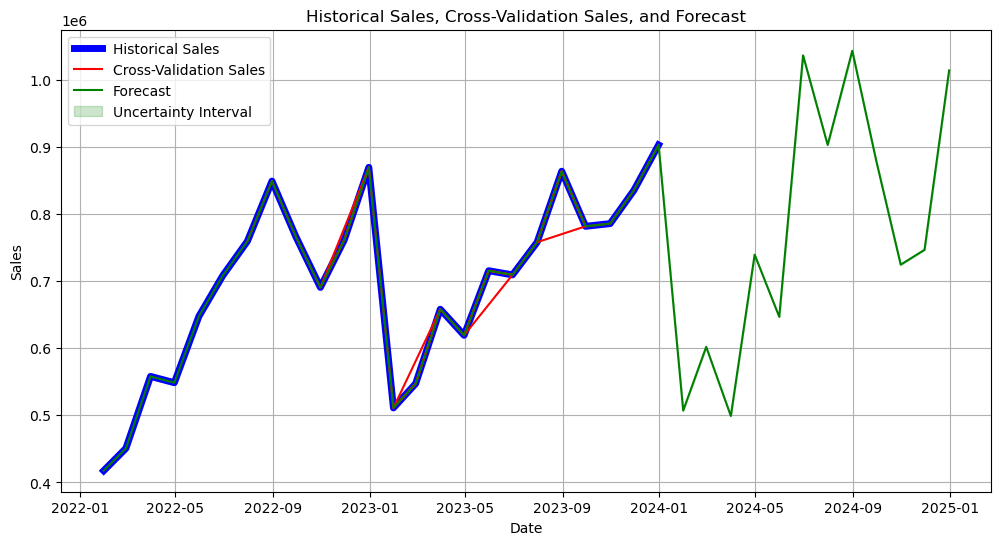

In [16]:
# Initialize the model with adjusted interval width
model = Prophet(yearly_seasonality=True, weekly_seasonality=False, changepoint_prior_scale=0.05, seasonality_prior_scale=1.0, interval_width=0.95)
model.add_seasonality(name='monthly', period=30.5, fourier_order=6)

# Fit the model
model.fit(monthly_sales)

# Perform cross-validation with adjusted parameters
df_cv = cross_validation(model, initial='90 days', period='90 days', horizon='180 days')

# Calculate performance metrics
df_p = performance_metrics(df_cv)
print("Performance Metrics Head:\n", df_p.head())

# Inspect some prediction intervals
print("Cross Validation Head with Prediction Intervals:\n", df_cv.head())

# Create a future dataframe for the forecast
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Inverse transform the forecasted values
forecast['yhat'] = scaler.inverse_transform(forecast[['yhat']])
forecast['yhat_lower'] = scaler.inverse_transform(forecast[['yhat_lower']])
forecast['yhat_upper'] = scaler.inverse_transform(forecast[['yhat_upper']])

# Inverse transform the cross-validation actual values
df_cv['y'] = scaler.inverse_transform(df_cv[['y']])

# Plot the historical data, cross-validation data, and forecasted data
plt.figure(figsize=(12, 6))

# Plot historical data in blue (Real Sales Line)
plt.plot(monthly_sales['ds'], scaler.inverse_transform(monthly_sales[['y']]), 'b-', label='Historical Sales', linewidth= 5)

# Plot the actual values from cross-validation in red
plt.plot(df_cv['ds'], df_cv['y'], 'r-', label='Cross-Validation Sales')

# Plot forecasted data in green
plt.plot(forecast['ds'], forecast['yhat'], 'g-', label='Forecast')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='green', alpha=0.2, label='Uncertainty Interval')

# Add titles and labels
plt.title('Historical Sales, Cross-Validation Sales, and Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


15:05:29 - cmdstanpy - INFO - Chain [1] start processing
15:06:34 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/5 [00:00<?, ?it/s]

15:06:35 - cmdstanpy - INFO - Chain [1] start processing
15:06:38 - cmdstanpy - INFO - Chain [1] done processing
15:06:38 - cmdstanpy - INFO - Chain [1] start processing
15:06:38 - cmdstanpy - INFO - Chain [1] done processing
15:06:39 - cmdstanpy - INFO - Chain [1] start processing
15:06:39 - cmdstanpy - INFO - Chain [1] done processing
15:06:40 - cmdstanpy - INFO - Chain [1] start processing
15:06:43 - cmdstanpy - INFO - Chain [1] done processing
15:06:43 - cmdstanpy - INFO - Chain [1] start processing
15:06:45 - cmdstanpy - INFO - Chain [1] done processing


Performance Metrics Head:
   horizon       mse      rmse       mae      mape     mdape     smape  \
0 25 days  0.007548  0.086881  0.071699  0.127475  0.067640  0.118378   
1 26 days  0.167846  0.409690  0.287520  1.306499  0.248957  0.523814   
2 27 days  0.182741  0.427482  0.325354  1.344035  0.361565  0.552084   
3 53 days  0.183084  0.427884  0.330290  1.337906  0.361565  0.546288   
4 54 days  1.817583  1.348178  1.106034  2.669084  2.605057  1.059243   

   coverage  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
Cross Validation Head with Prediction Intervals:
           ds      yhat  yhat_lower  yhat_upper         y     cutoff
0 2022-07-31  0.656620    0.656620    0.656620  0.704256 2022-07-09
1 2022-08-31  0.931182    0.931182    0.931182  0.889008 2022-07-09
2 2022-09-30  5.602162    5.602162    5.602162  0.719054 2022-07-09
3 2022-10-31  2.561993    2.561993    2.561993  0.562735 2022-07-09
4 2022-11-30  5.641881    5.641881    5.641881  0.707955 202

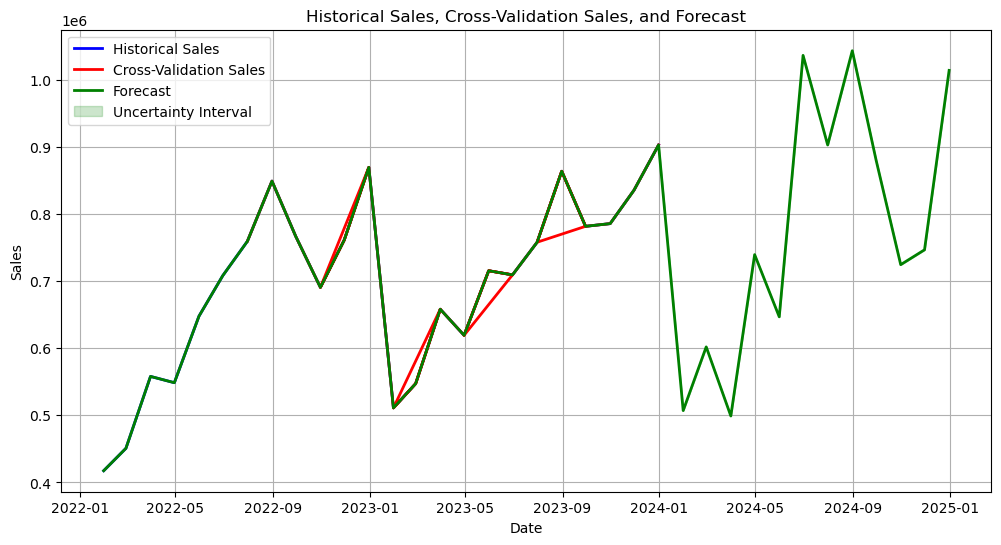

In [17]:
# Initialize the model with adjusted interval width
model = Prophet(yearly_seasonality=True, weekly_seasonality=False, changepoint_prior_scale=0.05, seasonality_prior_scale=1.0, interval_width=0.95)
model.add_seasonality(name='monthly', period=30.5, fourier_order=6)

# Fit the model
model.fit(monthly_sales)

# Perform cross-validation with adjusted parameters
df_cv = cross_validation(model, initial='90 days', period='90 days', horizon='180 days')

# Calculate performance metrics
df_p = performance_metrics(df_cv)
print("Performance Metrics Head:\n", df_p.head())

# Inspect some prediction intervals
print("Cross Validation Head with Prediction Intervals:\n", df_cv.head())

# Create a future dataframe for the forecast
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Inverse transform the forecasted values and cross-validation actual values
forecast[['yhat', 'yhat_lower', 'yhat_upper']] = scaler.inverse_transform(forecast[['yhat', 'yhat_lower', 'yhat_upper']])
df_cv[['y', 'yhat', 'yhat_lower', 'yhat_upper']] = scaler.inverse_transform(df_cv[['y', 'yhat', 'yhat_lower', 'yhat_upper']])

# Plot the historical data, cross-validation data, and forecasted data
plt.figure(figsize=(12, 6))

# Plot historical data in blue (Real Sales Line)
plt.plot(monthly_sales['ds'], scaler.inverse_transform(monthly_sales[['y']]), 'b-', label='Historical Sales', linewidth=2)

# Plot the actual values from cross-validation in red
plt.plot(df_cv['ds'], df_cv['y'], 'r-', label='Cross-Validation Sales', linewidth=2)

# Plot forecasted data in green
plt.plot(forecast['ds'], forecast['yhat'], 'g-', label='Forecast', linewidth=2)
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='green', alpha=0.2, label='Uncertainty Interval')

# Add titles and labels
plt.title('Historical Sales, Cross-Validation Sales, and Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


15:06:46 - cmdstanpy - INFO - Chain [1] start processing
15:07:44 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/5 [00:00<?, ?it/s]

15:07:45 - cmdstanpy - INFO - Chain [1] start processing
15:07:47 - cmdstanpy - INFO - Chain [1] done processing
15:07:47 - cmdstanpy - INFO - Chain [1] start processing
15:07:47 - cmdstanpy - INFO - Chain [1] done processing
15:07:48 - cmdstanpy - INFO - Chain [1] start processing
15:07:48 - cmdstanpy - INFO - Chain [1] done processing
15:07:49 - cmdstanpy - INFO - Chain [1] start processing
15:07:53 - cmdstanpy - INFO - Chain [1] done processing
15:07:53 - cmdstanpy - INFO - Chain [1] start processing
15:07:56 - cmdstanpy - INFO - Chain [1] done processing


Performance Metrics Head:
   horizon       mse      rmse       mae      mape     mdape     smape  \
0 25 days  0.007548  0.086881  0.071699  0.127475  0.067640  0.118378   
1 26 days  0.167846  0.409690  0.287520  1.306499  0.248957  0.523814   
2 27 days  0.182741  0.427482  0.325354  1.344035  0.361565  0.552084   
3 53 days  0.183084  0.427884  0.330290  1.337906  0.361565  0.546288   
4 54 days  1.817583  1.348178  1.106034  2.669084  2.605057  1.059243   

   coverage  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
Cross Validation Head with Prediction Intervals:
           ds      yhat  yhat_lower  yhat_upper         y     cutoff
0 2022-07-31  0.656620    0.656620    0.656620  0.704256 2022-07-09
1 2022-08-31  0.931182    0.931182    0.931182  0.889008 2022-07-09
2 2022-09-30  5.602162    5.602162    5.602162  0.719054 2022-07-09
3 2022-10-31  2.561993    2.561993    2.561993  0.562735 2022-07-09
4 2022-11-30  5.641881    5.641881    5.641881  0.707955 202

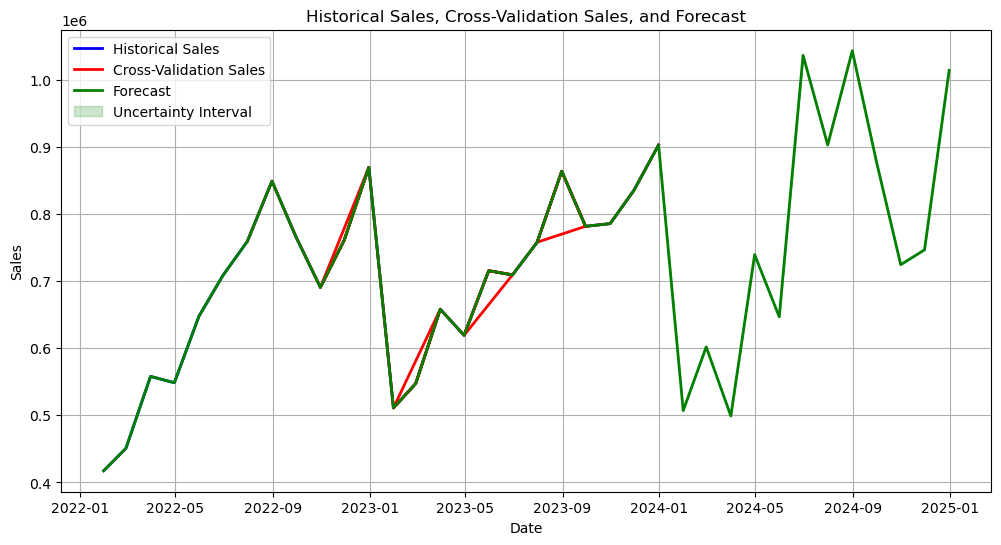

In [18]:
# Initialize the model with adjusted interval width
model = Prophet(yearly_seasonality=True, weekly_seasonality=False, changepoint_prior_scale=0.05, seasonality_prior_scale=1.0, interval_width=0.95)
model.add_seasonality(name='monthly', period=30.5, fourier_order=6)

# Fit the model
model.fit(monthly_sales)

# Perform cross-validation with adjusted parameters
df_cv = cross_validation(model, initial='90 days', period='90 days', horizon='180 days')

# Calculate performance metrics
df_p = performance_metrics(df_cv)
print("Performance Metrics Head:\n", df_p.head())

# Inspect some prediction intervals
print("Cross Validation Head with Prediction Intervals:\n", df_cv.head())

# Create a future dataframe for the forecast
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Ensure yhat_lower and yhat_upper are generated correctly
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

# Inverse transform the forecasted values and cross-validation actual values
forecast[['yhat', 'yhat_lower', 'yhat_upper']] = scaler.inverse_transform(forecast[['yhat', 'yhat_lower', 'yhat_upper']])
df_cv[['y', 'yhat', 'yhat_lower', 'yhat_upper']] = scaler.inverse_transform(df_cv[['y', 'yhat', 'yhat_lower', 'yhat_upper']])

# Plot the historical data, cross-validation data, and forecasted data
plt.figure(figsize=(12, 6))

# Plot historical data in blue (Real Sales Line)
plt.plot(monthly_sales['ds'], scaler.inverse_transform(monthly_sales[['y']]), 'b-', label='Historical Sales', linewidth=2)

# Plot the actual values from cross-validation in red
plt.plot(df_cv['ds'], df_cv['y'], 'r-', label='Cross-Validation Sales', linewidth=2)

# Plot forecasted data in green
plt.plot(forecast['ds'], forecast['yhat'], 'g-', label='Forecast', linewidth=2)
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='green', alpha=0.2, label='Uncertainty Interval')

# Add titles and labels
plt.title('Historical Sales, Cross-Validation Sales, and Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [19]:
import pandas as pd
import numpy as np

# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 Document_number           0
Order_date                0
Distribution_type         0
Partner_code              0
Product                   0
Product_type              0
Payment_type              0
Quantity_measurement      0
Quantity                  0
Unit_price                4
Discounted_unit_price     4
Sales                     0
Discount_%               28
Discount_lv               0
Returned_Ordered          0
unique_code               0
City                      0
Geo                       0
Customer_type             0
Customer_location         0
Customer_country          0
Address_updated           0
Latitude                  0
Longitude                 0
Adjusted_Sales            0
Is_weekend                0
Year                      0
Month                     0
CohortMonth               0
CohortIndex               0
dtype: int64


In [20]:
# Check for infinite values
print("\nInfinite Values:\n", data.isin([np.inf, -np.inf]).sum())



Infinite Values:
 Document_number          0
Order_date               0
Distribution_type        0
Partner_code             0
Product                  0
Product_type             0
Payment_type             0
Quantity_measurement     0
Quantity                 0
Unit_price               0
Discounted_unit_price    0
Sales                    0
Discount_%               0
Discount_lv              0
Returned_Ordered         0
unique_code              0
City                     0
Geo                      0
Customer_type            0
Customer_location        0
Customer_country         0
Address_updated          0
Latitude                 0
Longitude                0
Adjusted_Sales           0
Is_weekend               0
Year                     0
Month                    0
CohortMonth              0
CohortIndex              0
dtype: int64


In [21]:
# Check data types
print("\nData Types:\n", data.dtypes)


Data Types:
 Document_number                   int64
Order_date               datetime64[ns]
Distribution_type                object
Partner_code                     object
Product                          object
Product_type                     object
Payment_type                     object
Quantity_measurement             object
Quantity                        float64
Unit_price                      float64
Discounted_unit_price           float64
Sales                           float64
Discount_%                      float64
Discount_lv                     float64
Returned_Ordered                 object
unique_code                       int64
City                             object
Geo                              object
Customer_type                    object
Customer_location                object
Customer_country                 object
Address_updated                   int64
Latitude                        float64
Longitude                       float64
Adjusted_Sales            

In [22]:
# Summary statistics to identify any anomalies
print("\nSummary Statistics:\n", data.describe(include='all'))


Summary Statistics:
         Document_number                     Order_date Distribution_type  \
count     342298.000000                         342298            342298   
unique              NaN                            NaN                12   
top                 NaN                            NaN     Пласмент База   
freq                NaN                            NaN            101523   
mean       93482.116066  2023-01-07 21:28:10.211453440               NaN   
min            1.000000            2022-01-03 00:00:00               NaN   
25%       105751.000000            2022-07-14 00:00:00               NaN   
50%       111357.000000            2022-12-30 00:00:00               NaN   
75%       122927.000000            2023-07-13 00:00:00               NaN   
max       231231.000000            2023-12-31 00:00:00               NaN   
std        48670.670804                            NaN               NaN   

         Partner_code          Product  \
count          342298  

In [23]:
# Preparing data for the model
monthly_sales = data.resample('M', on='Order_date')['Adjusted_Sales'].sum().reset_index()
monthly_sales.columns = ['ds', 'y']

In [24]:
# Check the resampled data
print("\nMonthly Sales Head:\n", monthly_sales.head())
print("\nMonthly Sales Summary Statistics:\n", monthly_sales.describe())


Monthly Sales Head:
           ds          y
0 2022-01-31  424525.53
1 2022-02-28  459388.15
2 2022-03-31  567289.11
3 2022-04-30  556853.63
4 2022-05-31  654878.63

Monthly Sales Summary Statistics:
                         ds             y
count                   24      24.00000
mean   2023-01-14 10:00:00  704280.24375
min    2022-01-31 00:00:00  424525.53000
25%    2022-07-23 06:00:00  610181.06250
50%    2023-01-15 12:00:00  718966.12500
75%    2023-07-07 18:00:00  788947.05750
max    2023-12-31 00:00:00  908998.02000
std                    NaN  134830.82504


In [25]:
# Check for missing or infinite values in resampled data
print("\nMissing Values in Monthly Sales:\n", monthly_sales.isnull().sum())
print("\nInfinite Values in Monthly Sales:\n", monthly_sales.isin([np.inf, -np.inf]).sum())


Missing Values in Monthly Sales:
 ds    0
y     0
dtype: int64

Infinite Values in Monthly Sales:
 ds    0
y     0
dtype: int64


# Time Series Decomposition

<Figure size 1200x800 with 0 Axes>

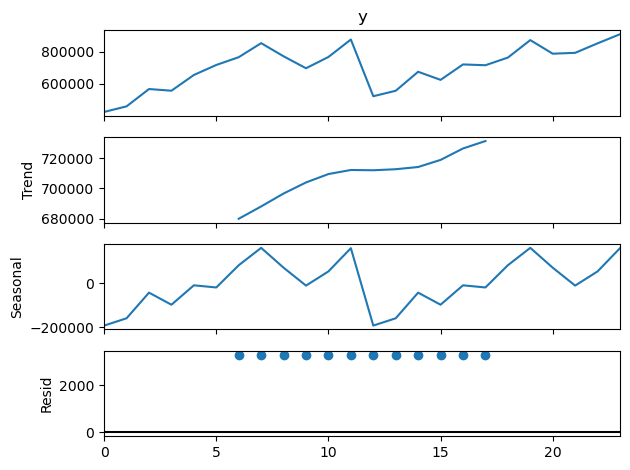

In [26]:
import statsmodels.api as sm

# Decompose the time series
decomposition = sm.tsa.seasonal_decompose(monthly_sales['y'], model='additive', period=12)

# Plot the decomposition
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

# SARIMA model

c:\Users\gabb_\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


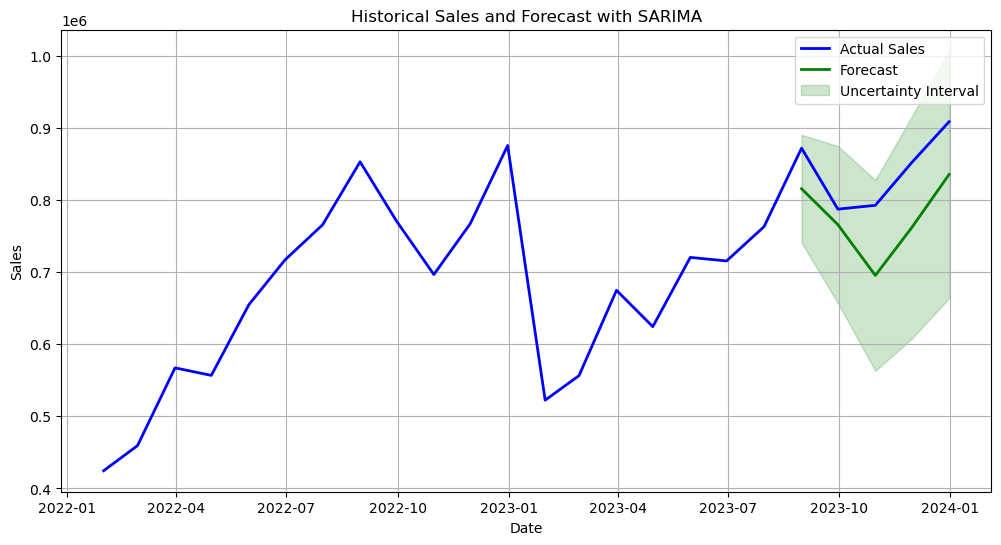

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load and prepare the data
#data = pd.read_csv('path_to_your_data.csv')
#data['Order_date'] = pd.to_datetime(data['Order_date'])
#monthly_sales = data.resample('M', on='Order_date')['Adjusted_Sales'].sum().reset_index()
#monthly_sales.columns = ['ds', 'y']

# Print the first few rows of the monthly_sales to ensure data is correctly loaded
#print("Monthly Sales Head:\n", monthly_sales.head())

# Split data into training and test sets
train_size = int(len(monthly_sales) * 0.8)
train, test = monthly_sales[:train_size], monthly_sales[train_size:]

# Fit the SARIMA model
model = SARIMAX(train['y'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit(disp=False)

# Forecast future values
forecast = results.get_forecast(steps=len(test))
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plot the historical data, forecasted data
plt.figure(figsize=(12, 6))

# Plot historical data in blue (Real Sales Line)
plt.plot(monthly_sales['ds'], monthly_sales['y'], 'b-', label='Actual Sales', linewidth=2)

# Plot forecasted data in green
plt.plot(test['ds'], forecast_mean, 'g-', label='Forecast', linewidth=2)
plt.fill_between(test['ds'], forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='green', alpha=0.2, label='Uncertainty Interval')

# Add titles and labels
plt.title('Historical Sales and Forecast with SARIMA')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [29]:
# Evaluation
mae = mean_absolute_error(test['y'], forecast_mean)
mse = mean_squared_error(test['y'], forecast_mean)
mape = np.mean(np.abs((test['y'] - forecast_mean) / test['y'])) * 100

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'MAPE: {mape:.2f}%')

MAE: 67733.85223001198
MSE: 5325281712.948834
MAPE: 8.02%


c:\Users\gabb_\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabb_\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabb_\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabb_\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observation

Best SARIMA model: ARIMA(0, 0, 0)x(0, 2, 0, 12) - AIC:2.0
MAE: 346611.121
MSE: 123905439839.31328
MAPE: 41.01%


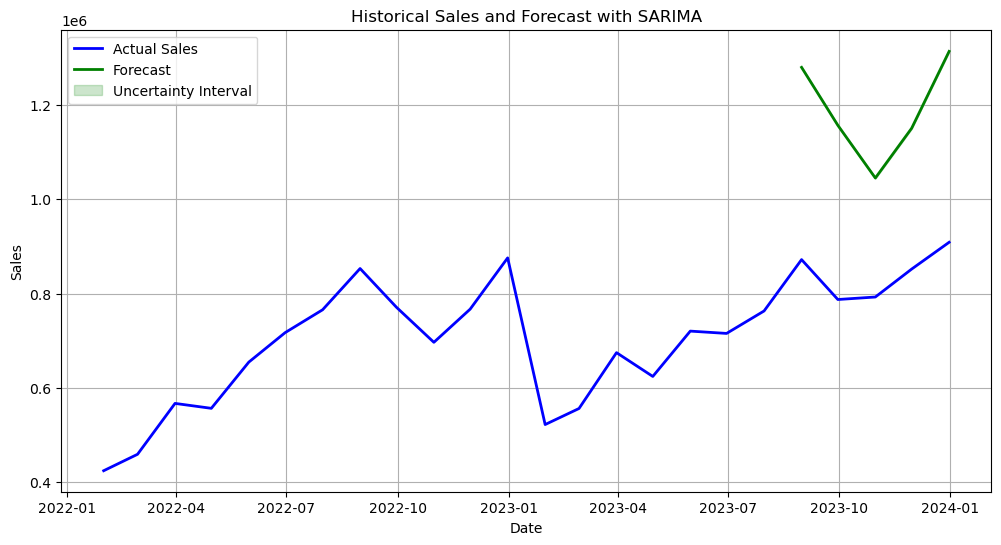

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split data into training and test sets
train_size = int(len(monthly_sales) * 0.8)
train, test = monthly_sales[:train_size], monthly_sales[train_size:]

# Define the p, d, q, P, D, Q, and m parameters to take any value from 0 to 2
p = d = q = P = D = Q = range(0, 3)
m = [12]  # Seasonal period (12 months for yearly seasonality)

# Generate all different combinations of p, d, q triplets
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(P, D, Q, m))

best_aic = float("inf")
best_pdq = None
best_seasonal_pdq = None
best_model = None

# Perform grid search to find the best parameters
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            temp_model = SARIMAX(train['y'],
                                 order=param,
                                 seasonal_order=param_seasonal,
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
            results = temp_model.fit(disp=False)
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
                best_model = results
        except Exception as e:
            continue

print(f'Best SARIMA model: ARIMA{best_pdq}x{best_seasonal_pdq} - AIC:{best_aic}')

# Forecast future values with the best model
forecast = best_model.get_forecast(steps=len(test))
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Evaluation
mae = mean_absolute_error(test['y'], forecast_mean)
mse = mean_squared_error(test['y'], forecast_mean)
mape = np.mean(np.abs((test['y'] - forecast_mean) / test['y'])) * 100

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'MAPE: {mape:.2f}%')

# Plot the historical data, forecasted data
plt.figure(figsize=(12, 6))

# Plot historical data in blue (Real Sales Line)
plt.plot(monthly_sales['ds'], monthly_sales['y'], 'b-', label='Actual Sales', linewidth=2)

# Plot forecasted data in green
plt.plot(test['ds'], forecast_mean, 'g-', label='Forecast', linewidth=2)
plt.fill_between(test['ds'], forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='green', alpha=0.2, label='Uncertainty Interval')

# Add titles and labels
plt.title('Historical Sales and Forecast with SARIMA')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


c:\Users\gabb_\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabb_\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabb_\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabb_\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observation

Best SARIMA model: ARIMA(3, 1, 0)x(0, 1, 0, 12) - AIC:-22.05011733226923
MAE: 249594.87529809074
MSE: 76925906497.67033
MAPE: 29.38%


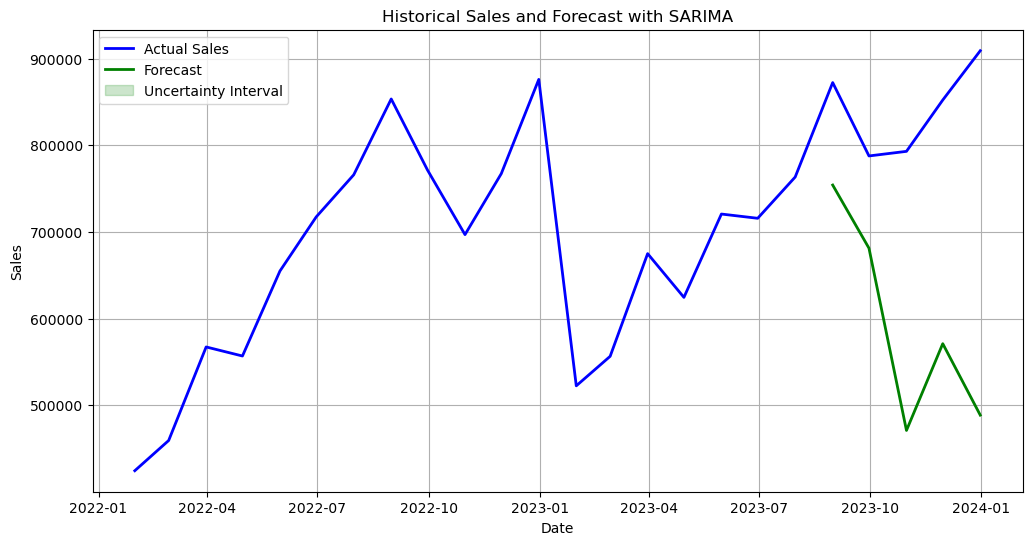

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split data into training and test sets
train_size = int(len(monthly_sales) * 0.8)
train, test = monthly_sales[:train_size], monthly_sales[train_size:]

# Define the p, d, q, P, D, Q, and m parameters to take any value from 0 to 3
p = d = q = range(0, 4)
P = D = Q = range(0, 3)
m = [12]  # Seasonal period (12 months for yearly seasonality)

# Generate all different combinations of p, d, q triplets
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(P, D, Q, m))

best_aic = float("inf")
best_pdq = None
best_seasonal_pdq = None
best_model = None

# Perform grid search to find the best parameters
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            temp_model = SARIMAX(train['y'],
                                 order=param,
                                 seasonal_order=param_seasonal,
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
            results = temp_model.fit(disp=False)
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
                best_model = results
        except Exception as e:
            continue

print(f'Best SARIMA model: ARIMA{best_pdq}x{best_seasonal_pdq} - AIC:{best_aic}')

# Forecast future values with the best model
forecast = best_model.get_forecast(steps=len(test))
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Evaluation
mae = mean_absolute_error(test['y'], forecast_mean)
mse = mean_squared_error(test['y'], forecast_mean)
mape = np.mean(np.abs((test['y'] - forecast_mean) / test['y'])) * 100

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'MAPE: {mape:.2f}%')

# Plot the historical data, forecasted data
plt.figure(figsize=(12, 6))

# Plot historical data in blue (Real Sales Line)
plt.plot(monthly_sales['ds'], monthly_sales['y'], 'b-', label='Actual Sales', linewidth=2)

# Plot forecasted data in green
plt.plot(test['ds'], forecast_mean, 'g-', label='Forecast', linewidth=2)
plt.fill_between(test['ds'], forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='green', alpha=0.2, label='Uncertainty Interval')

# Add titles and labels
plt.title('Historical Sales and Forecast with SARIMA')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [32]:
from statsmodels.graphics.tsaplots import plot_acf

c:\Users\gabb_\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabb_\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


MAE: 76529.16310191755
MSE: 6578569365.886439
MAPE: 8.98%


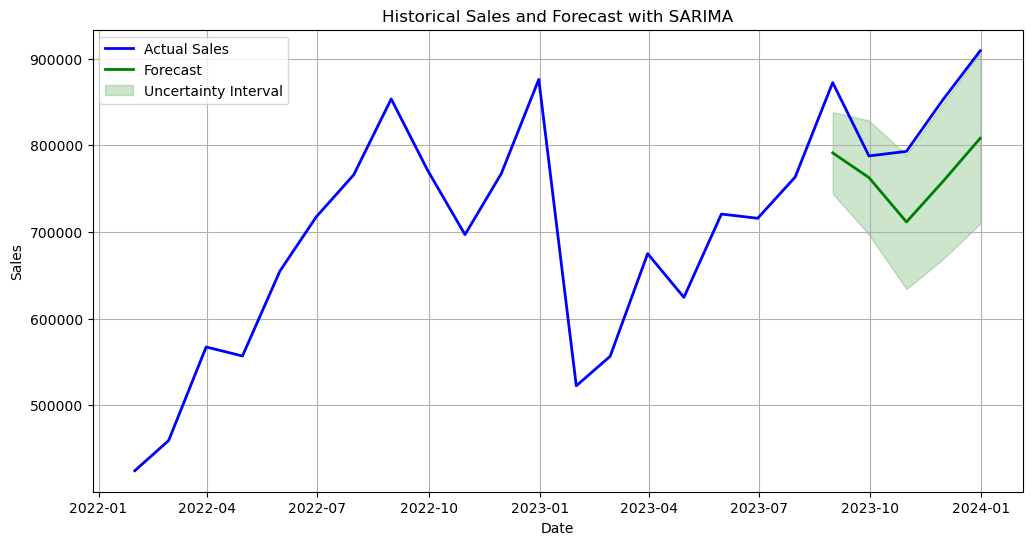

Residuals shape: (19,)


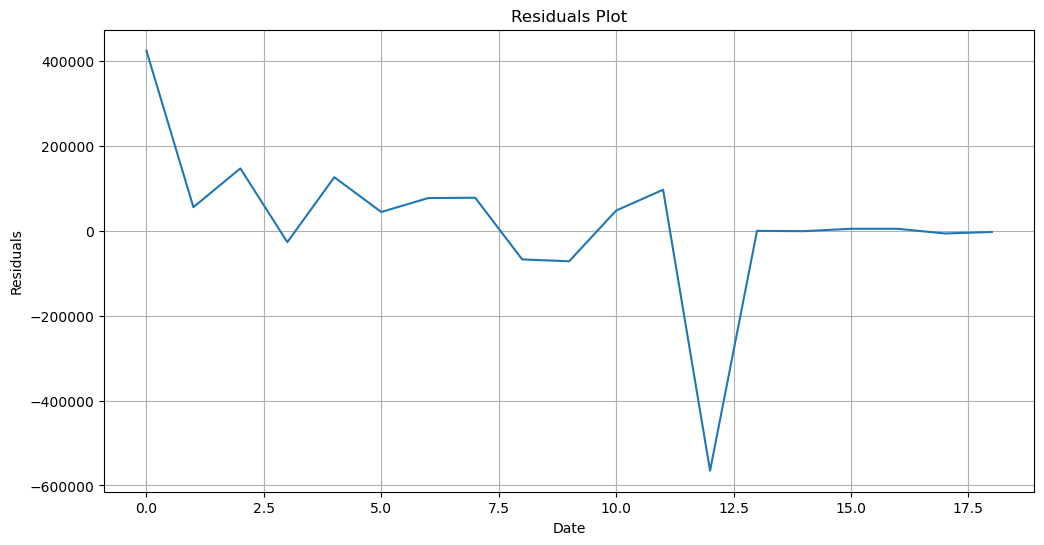

ValueError: could not broadcast input array from shape (19,) into shape (51,)

<Figure size 1200x600 with 0 Axes>

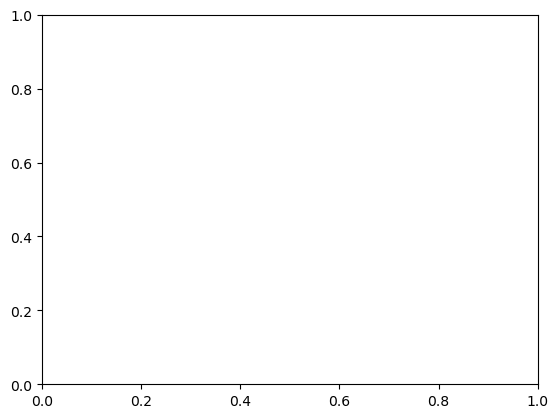

In [33]:

# Split data into training and test sets
train_size = int(len(monthly_sales) * 0.8)
train, test = monthly_sales[:train_size], monthly_sales[train_size:]

# Assuming best_model is obtained from previous hyperparameter tuning
# If best_model is not available, you can define and fit it here
model = SARIMAX(train['y'], order=(2, 1, 2), seasonal_order=(2, 1, 2, 12))
best_model = model.fit(disp=False)

# Forecast future values with the best model
forecast = best_model.get_forecast(steps=len(test))
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Evaluation
mae = mean_absolute_error(test['y'], forecast_mean)
mse = mean_squared_error(test['y'], forecast_mean)
mape = np.mean(np.abs((test['y'] - forecast_mean) / test['y'])) * 100

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'MAPE: {mape:.2f}%')

# Plot the historical data, forecasted data
plt.figure(figsize=(12, 6))

# Plot historical data in blue (Real Sales Line)
plt.plot(monthly_sales['ds'], monthly_sales['y'], 'b-', label='Actual Sales', linewidth=2)

# Plot forecasted data in green
plt.plot(test['ds'], forecast_mean, 'g-', label='Forecast', linewidth=2)
plt.fill_between(test['ds'], forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='green', alpha=0.2, label='Uncertainty Interval')

# Add titles and labels
plt.title('Historical Sales and Forecast with SARIMA')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Compute and plot the residuals
residuals = best_model.resid

# Ensure no NaNs in residuals
residuals = residuals.dropna()

# Print the shape of residuals
print(f"Residuals shape: {residuals.shape}")

# Plot the residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True)
plt.show()

# Plot ACF of residuals
plt.figure(figsize=(12, 6))
plot_acf(residuals, lags=50)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.grid(True)
plt.show()

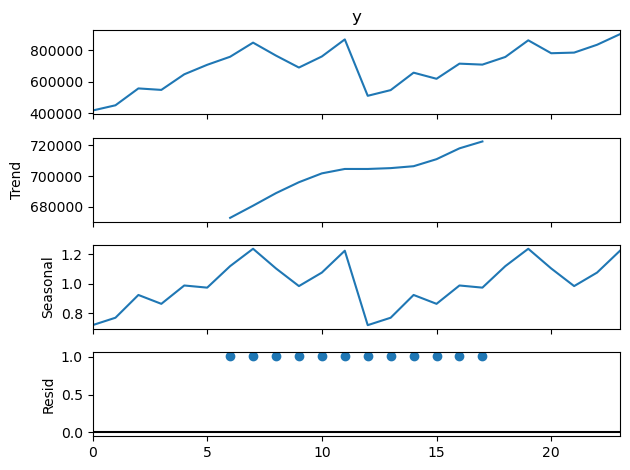

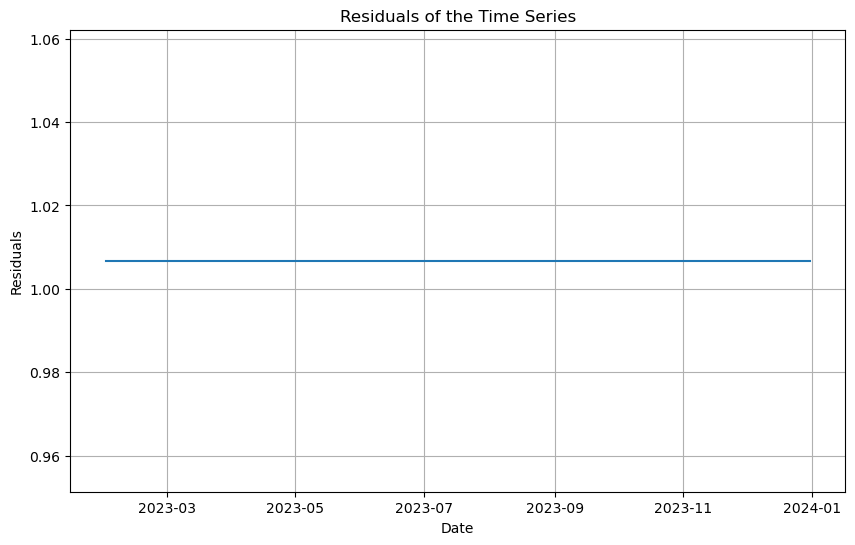

ADF Statistic: 0.0
p-value: 0.958532086060056
Critical Value 1%: -4.223238279489106
Critical Value 5%: -3.189368925619835
Critical Value 10%: -2.729839421487603
The residuals are not stationary (fail to reject the null hypothesis).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Load and prepare the data (assuming you have already done this)
# Example:
# data = pd.read_csv('path_to_your_data.csv')
# data['Order_date'] = pd.to_datetime(data['Order_date'])
# monthly_sales = data.resample('M', on='Order_date')['Adjusted_Sales'].sum().reset_index()
# monthly_sales.columns = ['ds', 'y']

# Decompose the time series
result = seasonal_decompose(monthly_sales['y'], model='multiplicative', period=12)
result.plot()
plt.show()

# Extract the residual component
residuals = result.resid.dropna()

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['ds'][len(result.trend.dropna()):], residuals)
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals of the Time Series')
plt.grid(True)
plt.show()

# Perform the Augmented Dickey-Fuller test on the residuals
adf_test = adfuller(residuals)
print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])
for key, value in adf_test[4].items():
    print(f'Critical Value {key}: {value}')

# Interpret the results
if adf_test[1] <= 0.05:
    print("The residuals are stationary (reject the null hypothesis).")
else:
    print("The residuals are not stationary (fail to reject the null hypothesis).")


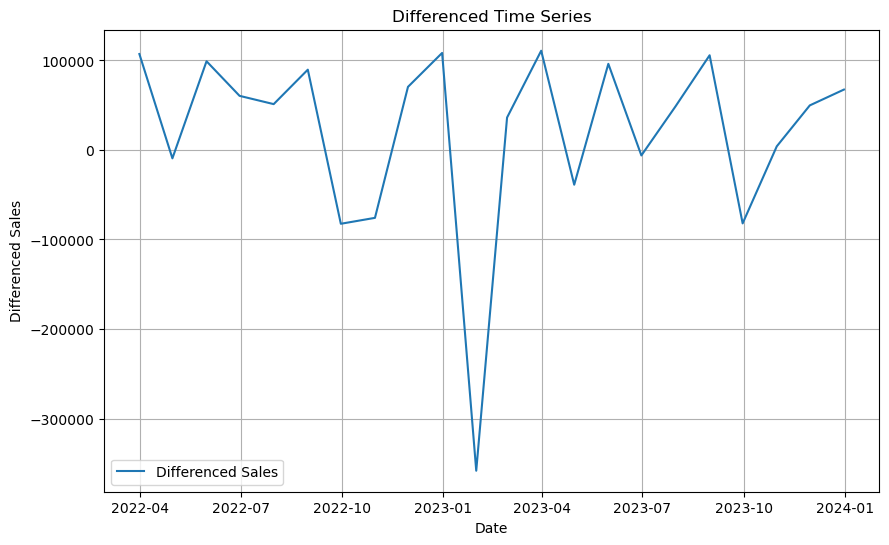

ADF Statistic: -4.606964421418025
p-value: 0.00012540509394526764
Critical Value 1%: -3.8092091249999998
Critical Value 5%: -3.0216450000000004
Critical Value 10%: -2.6507125
The differenced series is stationary (reject the null hypothesis).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load and prepare the data (assuming you have already done this)
# Example:
# data = pd.read_csv('path_to_your_data.csv')
# data['Order_date'] = pd.to_datetime(data['Order_date'])
# monthly_sales = data.resample('M', on='Order_date')['Adjusted_Sales'].sum().reset_index()
# monthly_sales.columns = ['ds', 'y']

# First Differencing
monthly_sales['y_diff'] = monthly_sales['y'].diff().dropna()

# Drop the NA values from differencing
monthly_sales = monthly_sales.dropna()

# Plot the differenced series
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['ds'], monthly_sales['y_diff'], label='Differenced Sales')
plt.xlabel('Date')
plt.ylabel('Differenced Sales')
plt.title('Differenced Time Series')
plt.grid(True)
plt.legend()
plt.show()

# Perform the Augmented Dickey-Fuller test on the differenced series
adf_test = adfuller(monthly_sales['y_diff'])
print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])
for key, value in adf_test[4].items():
    print(f'Critical Value {key}: {value}')

# Interpret the results
if adf_test[1] <= 0.05:
    print("The differenced series is stationary (reject the null hypothesis).")
else:
    print("The differenced series is not stationary (fail to reject the null hypothesis).")


c:\Users\gabb_\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gabb_\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gabb_\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabb_\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\gabb_\anaconda3\Lib\site-packages\statsmodels\tsa\

MAE: 72215.96529903481
MSE: 5874743977.66469
MAPE: 8.172087526623214 %


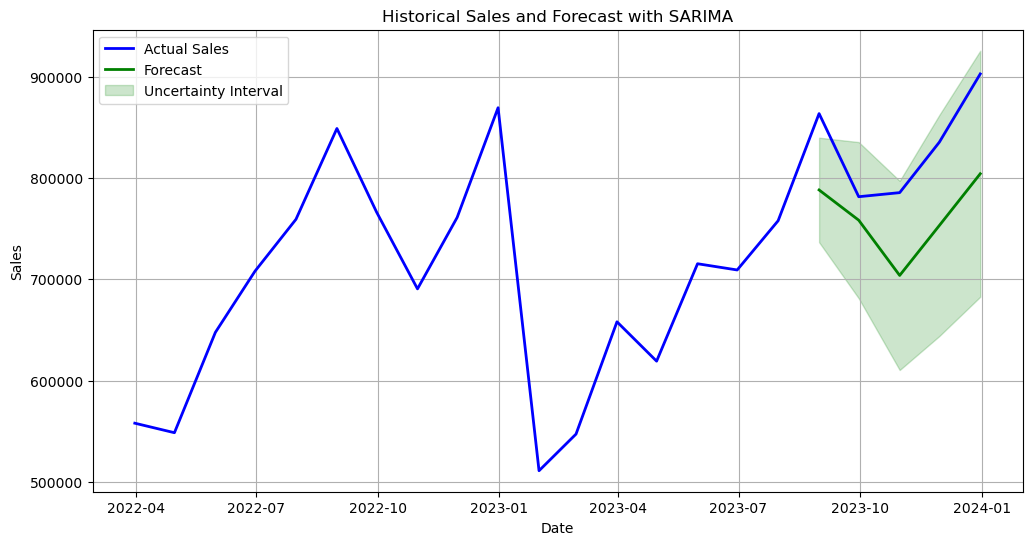

c:\Users\gabb_\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gabb_\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gabb_\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gabb_\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gabb_\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All param

Best SARIMA model: ARIMA(2, 1, 0)x(0, 1, 0, 12) - AIC:-31.035719069357853


c:\Users\gabb_\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gabb_\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gabb_\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\gabb_\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import itertools

# Assuming 'monthly_sales' DataFrame with 'ds' for dates and 'y' for sales
# Replace 'monthly_sales' with your actual DataFrame

# Split data into training and test sets
train_size = int(len(monthly_sales) * 0.8)  # Use 80% for training and 20% for testing
train, test = monthly_sales[:train_size], monthly_sales[train_size:]

# Define order and seasonal order (replace these with the best found parameters after tuning)
p, d, q = 1, 1, 1  # Example values, replace with actual
P, D, Q, S = 1, 1, 1, 12  # Example values, replace with actual

# Build and fit the SARIMA model
model = SARIMAX(train['y'], order=(p, d, q), seasonal_order=(P, D, Q, S))
model_fit = model.fit(disp=False)

# Make predictions
forecast = model_fit.get_forecast(steps=len(test))
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Evaluate the model
mae = mean_absolute_error(test['y'], forecast_mean)
mse = mean_squared_error(test['y'], forecast_mean)
mape = np.mean(np.abs((test['y'] - forecast_mean) / test['y'])) * 100

print("MAE:", mae)
print("MSE:", mse)
print("MAPE:", mape, "%")

# Plot the results
plt.figure(figsize=(12, 6))

# Plot historical data in blue (Real Sales Line)
plt.plot(monthly_sales['ds'], monthly_sales['y'], 'b-', label='Actual Sales', linewidth=2)

# Plot forecasted data in green
plt.plot(test['ds'], forecast_mean, 'g-', label='Forecast', linewidth=2)
plt.fill_between(test['ds'], forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='green', alpha=0.2, label='Uncertainty Interval')

# Add titles and labels
plt.title('Historical Sales and Forecast with SARIMA')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Hyperparameter tuning (Example: Grid Search)
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

best_aic = float("inf")
best_order = None
best_seasonal_order = None
best_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(train['y'], order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit(disp=False)
            
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = param
                best_seasonal_order = param_seasonal
                best_model = results
        except Exception as e:
            print(f"Error with configuration {param}x{param_seasonal}: {e}")
            continue

print(f'Best SARIMA model: ARIMA{best_order}x{best_seasonal_order} - AIC:{best_aic}')
